## Neighbourhood Listings in Descending Order

Show the listings per neighbourghood, with the most popular neighbourhoods first (that is, in decreasing neighbourhood popularity order).

# Exploring AirBnB in Athens

A lot has been said and written about the effect of AirBnB in Athens. In this assignment, you will use the data collected by [Inside AirBnB](http://insideairbnb.com), so you can go ahead and download the Athens data from http://insideairbnb.com/get-the-data.html.

Once you do that, spend some time familiarizing yourself with the data and then go ahead and do the following tasks.

* Import the required libraries to our assignment.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

* After that, we're going to import our file 'listings.csv.gz' to show the listings peri neighbourhood in decreasing popularity order. With 'popularity' we mean the neighbourhood it has the most listings or the most airbnb's.
* We do that by taking the column `neighbourhood_cleansed` and do a `value_counts` on the column(the `value_counts` method has default setting from the descending order.

In [2]:
airbnb=pd.read_csv("listings.csv")
airbnb.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,10595,https://www.airbnb.com/rooms/10595,20230921043851,2023-09-21,city scrape,Condo in Athens · ★4.83 · 3 bedrooms · 5 beds ...,The apartment is 3-bedroom apartment with 2-ba...,Ampelokipi district is nice multinational and ...,https://a0.muscache.com/pictures/f7e19a44-5afe...,37177,...,4.88,4.60,4.74,00000957568,t,7,7,0,0,0.28
1,10990,https://www.airbnb.com/rooms/10990,20230921043851,2023-09-21,city scrape,Rental unit in Athens · ★4.80 · 1 bedroom · 1 ...,Athens Quality Apartments - Deluxe apartment i...,Ampelokipi district is nice multinational and ...,https://a0.muscache.com/pictures/8645179/c1728...,37177,...,4.89,4.78,4.75,00001070920,t,7,7,0,0,0.49
2,10993,https://www.airbnb.com/rooms/10993,20230921043851,2023-09-21,city scrape,Rental unit in Athens · ★4.84 · Studio · 2 bed...,The Studio is an <br />-excellent located <br ...,Ampelokipi district is nice multinational and ...,https://a0.muscache.com/pictures/107309527/848...,37177,...,4.98,4.82,4.79,00000957080,t,7,7,0,0,0.69
3,10995,https://www.airbnb.com/rooms/10995,20230921043851,2023-09-21,city scrape,Rental unit in Athens · ★4.80 · 1 bedroom · 2 ...,"AQA No2 is 1-bedroom apartment (47m2), on the ...",Ampelokipi district is nice multinational and ...,https://a0.muscache.com/pictures/6a565613-aaa3...,37177,...,4.90,4.82,4.79,00000957422,t,7,7,0,0,0.19
4,724485,https://www.airbnb.com/rooms/724485,20230921043851,2023-09-21,city scrape,Rental unit in Athens · ★4.80 · 1 bedroom · 1 ...,"Value for money in an central but not ""tourist...",Opposite the building is one of Athens main pa...,https://a0.muscache.com/pictures/miso/Hosting-...,3745284,...,4.98,4.66,4.88,00000564690,t,2,2,0,0,3.87


In [3]:
listings_per_neighbourhood = airbnb['neighbourhood_cleansed'].value_counts()
listings_per_neighbourhood

ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ              2416
ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ                 1122
ΝΕΟΣ ΚΟΣΜΟΣ                          980
ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ             979
ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ     817
ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ                      583
ΠΑΓΚΡΑΤΙ                             511
ΑΜΠΕΛΟΚΗΠΟΙ                          452
ΚΟΛΩΝΑΚΙ                             425
ΘΗΣΕΙΟ                               386
ΑΚΡΟΠΟΛΗ                             386
ΠΕΤΡΑΛΩΝΑ                            352
ΚΕΡΑΜΕΙΚΟΣ                           343
ΚΥΨΕΛΗ                               271
ΣΤΑΔΙΟ                               252
ΓΟΥΔΙ                                230
ΙΛΙΣΙΑ                               216
ΠΛΑΤΕΙΑ ΑΜΕΡΙΚΗΣ                     180
ΝΙΡΒΑΝΑ                              174
ΠΑΤΗΣΙΑ                              166
ΛΥΚΑΒΗΤΤΟΣ                           162
ΖΑΠΠΕΙΟ                              161
ΑΝΩ ΚΥΨΕΛΗ                           119
ΓΚΥΖΗ                                118
ΠΕΔΙΟ ΑΡΕΩΣ     

## Neighbourhood Prices in Descending Order

Create a table with the prices per neighbourhood. The prices information should contain:

* median price per neighbourhood

* mean price per neighbourhood

* standard deviation per neighbourhood

* number of listings per neighbourhood.

The contents of the table should be in descending median prices.

* In this task, we are going to take the 'price' column, extract the `$` and `,` and convert it to integer in order to do a groupby to take the result we want. Once we do that, we sort are variable based on median.
* We groupby the columns `neighbourhood_cleansed` and `price` and with the `agg` function we can find the mean , the standard deviation, the median and the number of listings per neighbourhood with the `count` method. After that we proceed to the descending order using the `sort_values`.
* The `Regex=True` is about finding and cleaning text-based columns

In [4]:
airbnb['price']=pd.to_numeric(airbnb['price'].str.replace('$','',regex=True).str.replace(',','',regex=True))
airbnb['price'] = airbnb['price'].astype(int)
prices_per_neighbourhood = airbnb.groupby('neighbourhood_cleansed')['price'].agg(['mean','std','median','count'])
prices_per_neighbourhood_sorted = prices_per_neighbourhood.sort_values(by='median',ascending=False)
prices_per_neighbourhood_sorted

,mean,std,median,count
neighbourhood_cleansed,,,,
ΡΗΓΙΛΛΗΣ,367.800000,578.622675,120.0,5
ΖΑΠΠΕΙΟ,224.068323,641.163173,114.0,161
ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,140.650662,229.183015,104.0,2416
ΑΚΡΟΠΟΛΗ,195.344560,703.321565,100.0,386
ΚΟΛΩΝΑΚΙ,128.595294,104.431349,100.0,425
ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ,120.284314,104.613533,90.5,1122
ΘΗΣΕΙΟ,126.492228,124.176775,90.0,386
ΚΕΡΑΜΕΙΚΟΣ,123.883382,136.367487,89.0,343
ΛΥΚΑΒΗΤΤΟΣ,104.561728,87.859850,75.0,162


## Availability per Day

Create a plot with the number of listings available per day, on the $y$ axis, and the date, on the $x$ axis.

* In this task, to create a plot with the number of listings available per day. We'll take `calendar.csv` file , we are going to replace in `available` column the `t` variable to `TRUE` and the `f` variable to `FALSE`. After that we `GROUPBY` the `date` column and `available` in order to create a table with the number of listings available per day. In the end, we create a plot with the matplotlib library.

* Also we have to convert our date in datetime with the `pd.to_datetime` in order to use the column `date` as a datetime and not as another type.

* In the plot we define the size with `figsize` , we name our labels , we give a title , we give Grid the variable True to split the plot for better readability and then we show the plot.

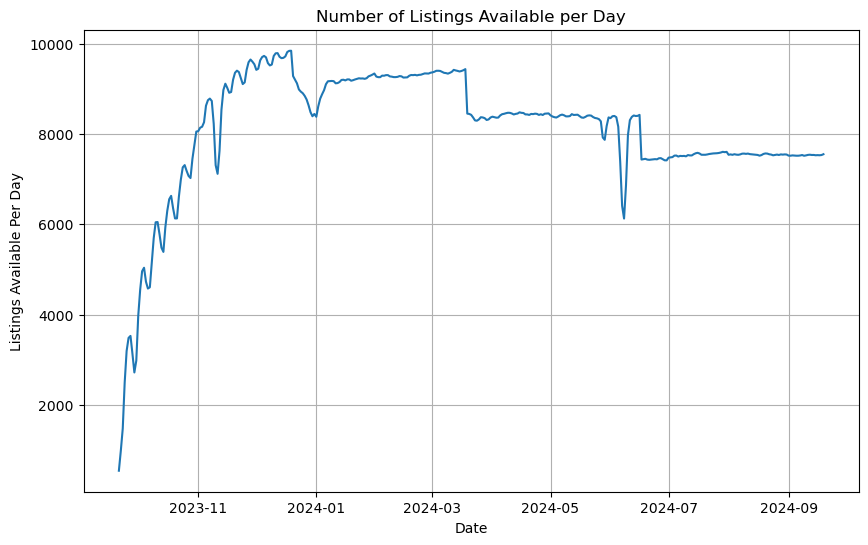

In [5]:
calendar = pd.read_csv('calendar.csv')
calendar['available'] = calendar['available'].replace('t',True).replace('f',False)
listings_available_per_day = calendar.groupby('date')['available'].agg(['sum']).reset_index()
listings_available_per_day['date'] = pd.to_datetime(listings_available_per_day['date'])
plt.figure(figsize=(10, 6))
plt.plot(listings_available_per_day['date'], listings_available_per_day['sum'])
plt.xlabel('Date')
plt.ylabel('Listings Available Per Day')
plt.title('Number of Listings Available per Day')
plt.grid(True) # split the plots into rectangles to have a better vision of the plot

plt.show()

## Reviews, Occupacy per Listing, Average Income

Create a histogram showing the number of reviews per listing. The histogram should bin the number of reviews, from the smallest amount of reviews in a listing, to the maximum number of reviews in a listing rounded up to the closest hundred.

Once you have done that, calculate the average occupacy per listing per month. To calculate that, find the average reviews per month and assume that half of the bookings result in reviews.

Then, assuming that each booking is for a three nights stay, calculate the average income per month, using the average price charged throughout all listings.

## REVIEWS

* Here we'll use the `reviews.csv` file , we'll do a groupby the columns `listing_id` and `date` to count the number of reviews per listing, After that we define two variables `min_reviews` and `max_reviews` to bin the histogram as it is says in above. The `np.ceil` method is used to round up the max reviews to the closest hundred.

Here's the breakdown of each part of this expression:

- `min_reviews`: This is the minimum number of reviews in your dataset. It serves as the start point for creating the bins.

- `max_bin + 101`: The `max_bin` represents the maximum number of reviews rounded up to the nearest hundred. Adding 101 ensures that the upper end of the range includes values up to `max_bin` (i.e., the range includes the maximum number of reviews).

- `100`: This value represents the width of each bin. Bins are created at intervals of 100 reviews, so it ensures that the bins represent ranges of 100 reviews each.

So, `np.arange(min_reviews, max_bin + 101, 100)` generates an array of bin edges that starts at the minimum number of reviews, increments by 100 reviews, and includes values up to and including the maximum rounded-up number of reviews. These bins are used in the histogram to group the data into discrete intervals for visualization.

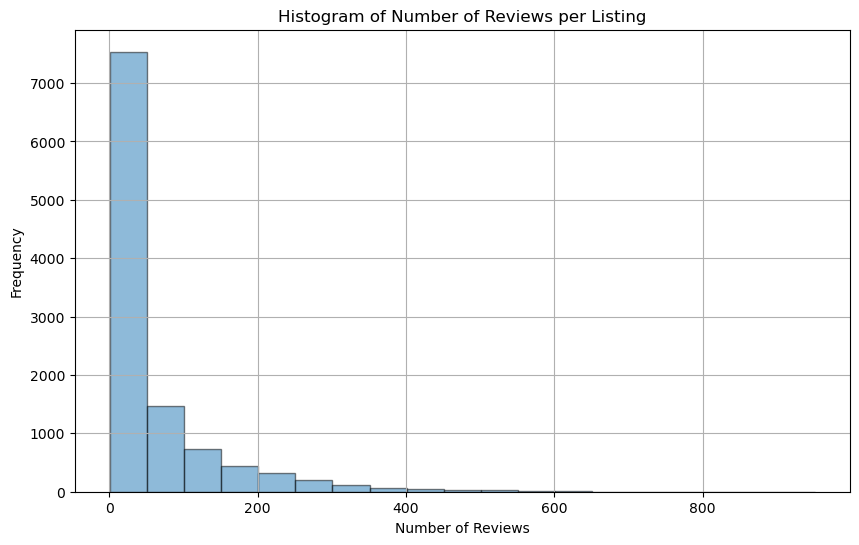

In [6]:
reviews = pd.read_csv('reviews.csv')
reviews_per_listing = reviews.groupby('listing_id')['date'].agg(['count']).reset_index()
min_reviews = reviews_per_listing['count'].min()
max_reviews = np.ceil(reviews_per_listing['count'].max() / 100) * 100
plt.figure(figsize=(10, 6))
plt.hist(reviews_per_listing['count'],bins=np.arange(min_reviews, max_reviews + 101,50),  edgecolor='black',alpha=0.5)
plt.title('Histogram of Number of Reviews per Listing')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## OCCUPACY PER LISTING

* In this task we'll work with the DataFrames `reviews` and `reviews_per_listing`. All we have to do is convert the column `reviews['date']` to datetime and after that we'll extract the month of each date to calculate the occupacy per listing per month. 

In [7]:
reviews
reviews_per_listing
# Convert the date column to datetime
reviews['date'] = pd.to_datetime(reviews['date'])
# Extract month and year
reviews['month'] = reviews['date'].dt.month

* After, we are going to merge the `reviews` and `reviews_per_listing` dataframe with the `pd.merge` method and after that we calculate the `average_reviews` per listing per month with a groupby in `listing_id` and `month` .

* Note that the default `join` in `pd.merge` is inner so I do an inner join.

* reviews_pl_pm stands for reviews per listing per month.

In [8]:
merged_df = pd.merge(reviews, reviews_per_listing, on='listing_id')
average_reviews = merged_df.groupby(['listing_id',  'month'])['count'].count().reset_index()
##### RENAME COLUMNS #######
average_reviews = average_reviews.rename(columns={'listing_id': 'listing_id', 'month': 'Month', 'count': 'reviews_pl_pm'})
average_reviews

,listing_id,Month,reviews_pl_pm
0,10595,1,3
1,10595,2,4
2,10595,3,3
3,10595,4,3
4,10595,5,6
...,...,...,...
80093,975413215364080586,9,4
80094,975966554881091774,9,1
80095,976076532701121190,9,1
80096,977373669051180593,9,2


* So, now we are able to calculate the average occupay per listing per month assuming that half of the bookings result in reviews, and after we can calculate the average income per month, using the average price charged throughout all listings, assuming that each booking is for a three nights stay.

In [9]:
average_reviews['num_bookings'] = average_reviews['reviews_pl_pm']*2
average_reviews['3_nights_stay'] = average_reviews['num_bookings']*3
average_occupacy = average_reviews.sort_values(by=['Month','listing_id'])
average_occupacy

,listing_id,Month,reviews_pl_pm,num_bookings,3_nights_stay
0,10595,1,3,6,18
11,10990,1,10,20,60
23,10993,1,17,34,102
35,10995,1,2,4,12
45,27262,1,2,4,12
...,...,...,...,...,...
72688,784455206340476330,12,1,2,6
72701,784719860855398969,12,1,2,6
72804,786700736827591297,12,1,2,6
72827,786844914869152030,12,1,2,6


In [10]:
average_price = airbnb['price'].mean()
average_income = average_occupacy
average_income['average income per month'] = average_income['3_nights_stay']*average_price.round(1)
average_income['average income per month'] = '$' + average_income['average income per month'].astype(str)
average_income

,listing_id,Month,reviews_pl_pm,num_bookings,3_nights_stay,average income per month
0,10595,1,3,6,18,$1989.0
11,10990,1,10,20,60,$6630.0
23,10993,1,17,34,102,$11271.0
35,10995,1,2,4,12,$1326.0
45,27262,1,2,4,12,$1326.0
...,...,...,...,...,...,...
72688,784455206340476330,12,1,2,6,$663.0
72701,784719860855398969,12,1,2,6,$663.0
72804,786700736827591297,12,1,2,6,$663.0
72827,786844914869152030,12,1,2,6,$663.0


## Listings per Room Type

Show the number of listings per room type, in absolute numbers, and also in percentages (the percentage of listings for each particular room type). Then, show the number of listings per neighrbourhood and room type.

To get the listings per room type in absolute numbers, we can only work with the column `airbnb['room_type']` and do a `values_counts()`. As for the percentages, we divide the `listings_per_room_type` with the `shape[0]` of airbnb dataset and multiply it with 100

In [11]:
listings_per_room_type = airbnb['room_type'].value_counts()
listings_per_room_type

Entire home/apt    11652
Private room        1113
Hotel room           105
Shared room           85
Name: room_type, dtype: int64

In [12]:
percentages = listings_per_room_type/airbnb.shape[0] * 100 
percentages

Entire home/apt    89.942107
Private room        8.591277
Hotel room          0.810498
Shared room         0.656117
Name: room_type, dtype: float64

* To show the number of listings per neighbourhood we'll groupby the columns `neighbourhood_cleansed` and `room_type` and then do a `value_counts()`

In [13]:
listings_pr_prt = airbnb.groupby('neighbourhood_cleansed')['room_type']
listings_pr_prt.value_counts()

neighbourhood_cleansed            room_type      
1Ο ΝΕΚΡΟΤΑΦΕΙΟ                    Entire home/apt     55
ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ                  Entire home/apt     33
                                  Private room         5
ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ  Entire home/apt    686
                                  Private room       117
                                                    ... 
ΣΤΑΔΙΟ                            Private room        11
ΣΤΑΘΜΟΣ ΛΑΡΙΣΗΣ                   Entire home/apt     73
                                  Hotel room           4
                                  Private room         4
                                  Shared room          4
Name: room_type, Length: 111, dtype: int64

## Prices per Day

Create a table with the average price per listing per day. Draw a graph visualizing the table.

* We will work with the `calendar` DataFrame. We'll group the columns `date` and `price` using `agg(['mean'])` to calculate the average price per listing per day. Then we'll plot these two columns.

In [14]:
calendar['price']=pd.to_numeric(calendar['price'].str.replace('$', '',regex=True).str.replace(',','',regex=True))

In [15]:
calendar['date'] = pd.to_datetime(calendar['date'])
avg_pr_list_pr_day = calendar.groupby('date')['price'].agg(['mean']).reset_index()
avg_pr_list_pr_day

,date,mean
0,2023-09-21,113.107689
1,2023-09-22,116.212290
2,2023-09-23,116.264860
3,2023-09-24,113.045932
4,2023-09-25,111.629226
...,...,...
360,2024-09-15,110.923736
361,2024-09-16,110.402933
362,2024-09-17,110.385488
363,2024-09-18,110.298572


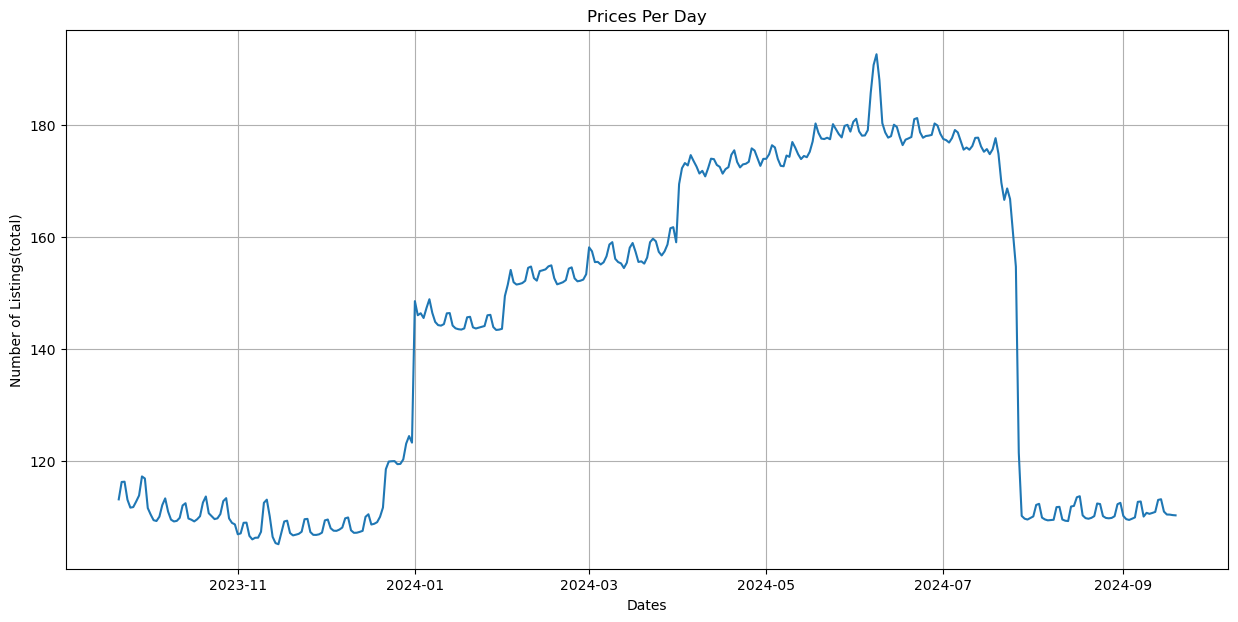

In [16]:
plt.figure(figsize=(15, 7))
plt.plot(avg_pr_list_pr_day['date'], avg_pr_list_pr_day['mean'])
plt.title('Prices Per Day')
plt.xlabel('Dates')
plt.ylabel('Number of Listings(total)')
plt.grid(True)
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.show()

## Listings per Host

Create a table with the number of listings per host, in descending order. Create a graph that will show the distribution of listings per host, as follows:

* You will rank the host on a number of listings basis. So, the first host will be the one with the largest number of listings, the second host will be the one with the second largest number of listings, etc. If there is a number of hosts with the same listings, just add them in sequence. For instance, if there are 10 hosts with one listing each, add them in the ranking with any order between them.

* On the $y$ axis you will have the number of listings.

That is, a point $(x, y)$ will mean that the $x$-th highest hosting host has $y$ listings.

After you have drawn the plot, do another one, this time with the $x$ axis in *logarithmic* scale.

* We'll work with the `listings.csv.gz` dataset. After we read it we'll groupby the `host_id` column to calculate the number of listings for each host and we'll use the `size` method to take the number of listings per host anf after we must reset the index. Also, we have to sort this values because we must rank the host rank in descending order (1st host = Largest number of listings, 2nd host = Second largest number of listings etc..). After that we'll plot the data in normal and logarithmic scale.

## NORMAL SCALE

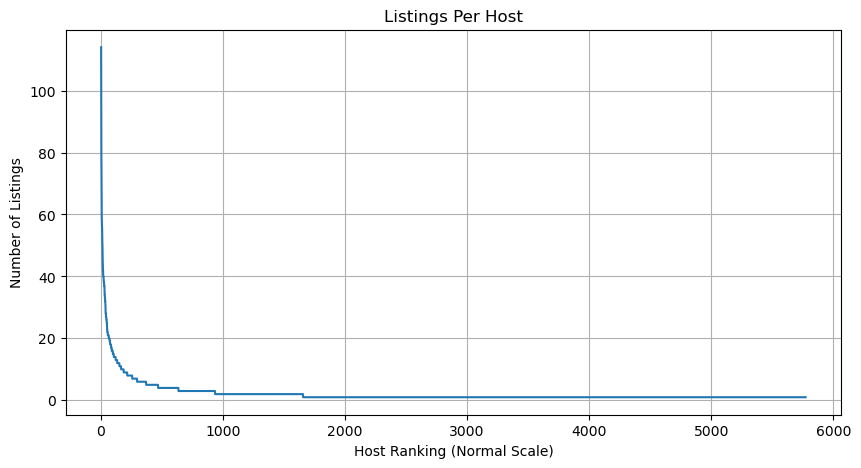

In [17]:
# Load the Airbnb data for Athens 
listings = pd.read_csv('listings.csv')

# Group the data by 'host_id' and count the number of listings for each host
listings_pr_host = listings.groupby('host_id').size().reset_index(name='listings')

# Sort the hosts by the number of listings in descending order
listings_pr_host = listings_pr_host.sort_values(by='listings', ascending=False)

# Plot the data with a logarithmic x-axis
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(listings_pr_host) + 1), listings_pr_host['listings'])
plt.title('Listings Per Host')
plt.xlabel('Host Ranking (Normal Scale)')
plt.ylabel('Number of Listings')
plt.grid(True)




# Show the plot
plt.show()

## LOGARITHMIC SCALE

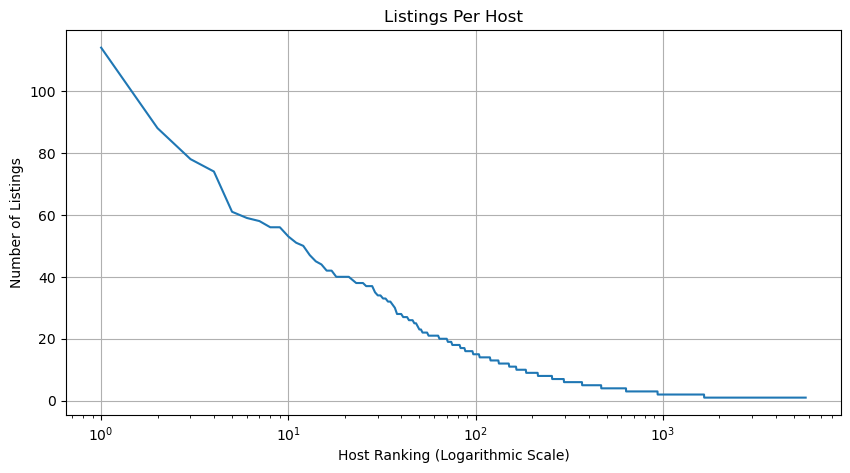

In [18]:
# Load the Airbnb data for Athens 
listings = pd.read_csv('listings.csv')

# Group the data by 'host_id' and count the number of listings for each host
listings_pr_host = listings.groupby('host_id').size().reset_index(name='listings')

# Sort the hosts by the number of listings in descending order
listings_pr_host = listings_pr_host.sort_values(by='listings', ascending=False)

# Plot the data with a logarithmic x-axis
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(listings_pr_host) + 1), listings_pr_host['listings'])
plt.title('Listings Per Host')
plt.xlabel('Host Ranking (Logarithmic Scale)')
plt.xscale('log') # Set the x-axis to logarithmic scale
plt.ylabel('Number of Listings')
plt.grid(True)




# Show the plot
plt.show()

## Visualize Listings

Draw an interactive map to show the listings ovelayed on Athens.

You can use the [folium](https://github.com/python-visualization/folium) library to create your map; spend some time reading the documentation.

The map should show each listing and on clicking on top of it, the user should see a short description of the listing.

Note that such a map is heavy on resources. You will probably *not* be able to include it in a Jupyter notebook, so you should save it to an external HTML file that can be opened by any browser. Also, to make things easier, you make wish to limit the maximum zoom level from 12 to 15 (after you read folium's documentation you will know what this is).

Hint: be careful witht he description data, if they contain some characters they may not be rendered in HTML and may destroy your output.

* In this task, we will import our requires libraries to create the interactive map. The `folium` map is used for visualizing geospatial data. It is easy to use and yet a powerful library. Folium is a Python wrapper for Leaflet. js which is a leading open-source JavaScript library for plotting interactive maps.

* Then we add the `neighbourhoods.geojson` filea to add layers(borders) in our map

* After that, we customize the map to print a result similar to the map of the airbnb and in the end we save the map in a html file. I write some `html` code to do it very similar to the airbnb's site. So i add the circle in the secription, i increase the font, i attached the url in the name, i cut horizontal the dexcription and put it in a larger box and in the end with the tooltip method I make the description automated, i.e. once you move the mouse in one circle you can show the description automatically without clicking on it.

* I personally increase the zoom size to 20 to give more transparency in each circle.
 


In [19]:
# Load your dataset with listing information 
listings_df = pd.read_csv('listings.csv')
import folium
from folium import plugins
from folium import features

listings_df['price']=pd.to_numeric(listings_df['price'].str.replace('$','',regex=True).str.replace(',','',regex=True))
listings_df['price'] = listings_df['price'].astype(int)

In [20]:
# Create a map centered around Athens
athens_map = folium.Map(location=[37.9838, 23.7275], zoom_start=12, max_zoom=20)

# Add the GeoJSON layer for neighborhoods
folium.GeoJson("neighbourhoods.geojson").add_to(athens_map)


# Create custom CircleMarker for each listing with custom pop-up content
for index, row in listings_df.iterrows():
    description_list = (
        f"<div class='circle-marker'></div>"  # Add a small blue circle
        f"<strong><em></em></strong> <strong><span style='font-size: 1.2em;'><a href='{row['listing_url']}' target='_blank'>{row['name']}</a></span></strong><br>" 
        f"<strong> by </strong> {row['host_name']}<br>"
        f"<strong></strong> {row['neighbourhood_cleansed']}<br>"
        f"<div class='popup-divider'></div>" 
        f"{3*row['number_of_reviews']}<strong> nights last yr </strong> <strong>(</strong>{row['number_of_reviews']}<strong> reviews)</strong><br>"
        f"${30*row['price']}<strong> /month </strong> <strong>($</strong>{12*30*row['price']}<strong> last yr)</strong><br>"
        f"©${row['price']}<strong> /night </strong> <strong>,</strong>{row['minimum_nights']}<strong> night min</strong><br>"
       
    )
    description_list += '<style>.leaflet-popup-content { max-width: 300px; min-width: 200px; min-height: 150px; }</style>'
    description_list += '<style>.circle-marker { background-color: blue; width: 10px; height: 10px; border-radius: 50%; display: inline-block; margin-right: 5px; }</style>'
    description_list += '<style>.popup-divider { border-top: 2px solid #000; margin: 10px 0; }</style>'


    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=2,  # You can adjust the size of the circle marker as needed
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=1,
        tooltip=description_list,
        popup=folium.Popup(description_list,max_width=300),
    ).add_to(athens_map)




# Save the map to an external HTML file
athens_map.save("athens_listings_and_neighborhoods_map.html")


## Submission Instructions

You must submit your assignment as a Jupyter notebook that will contain the full code and documentation of how you solved the questions, plus the HTML file containing the visualization of the last question. The Jupyter notebook must be fully replicable: that is, somebody reading it must be able to do exactly what you did and obtain the same results.

The documentation must be at the level where somebody that has some Pandas and Python knowledge can understand exactly what you are doing and why. Your output must be as user-friendly as possible. That means that your output tables should not include zillions of columns that are not needed for your analysis.

## Honor Code

You understand that this is an individual assignment, and as such you must carry it out alone. You may seek help on the Internet, by Googling or searching in StackOverflow for general questions pertaining to the use of Python and pandas libraries and idioms. However, it is not right to ask direct questions that relate to the assignment and where people will actually solve your problem by answering them. You may discuss with your colleagues in order to better understand the questions, if they are not clear enough, but you should not ask them to share their answers with you, or to help you by giving specific advice.